In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 3d 그래프 -> ./C3Dfile/trc -> x1,y1,z1 각 마커들. 인덱스가 시계열. 

In [3]:
# 목표
# x, y축 회전시켜서 0~75 모든 무게에 대해 그래프 그려보기
# 그래프는 높이가 다 같게 -> 비율로 그리기

df = pd.read_excel('bar_data.xlsx') 
df


,weight_position,Hip Joints Moment(Nm/kg),Knee Joints Moment(Nm/kg),Ankle Joints Moment (Nm/kg)
0,0_A,1.566568,1.614589,0.262916
1,0_C,1.484634,2.325558,0.892500
2,0_P,1.553947,2.418742,1.137302
3,25_A,2.408326,2.165785,0.436790
4,25_C,1.950414,3.129835,1.320998
5,25_P,1.995123,3.242179,1.519303
6,50_A,2.681075,2.922733,0.570426
7,50_C,2.497126,3.523523,1.204678
8,50_P,2.458731,3.842882,1.705532
9,75_A,4.053534,3.232868,0.798084


In [4]:
# x, y축 회전시키기
df_transposed = df.set_index('weight_position').T
df_transposed.columns.name = None
df_transposed

,0_A,0_C,0_P,25_A,25_C,25_P,50_A,50_C,50_P,75_A,75_C,75_P
Hip Joints Moment(Nm/kg),1.566568,1.484634,1.553947,2.408326,1.950414,1.995123,2.681075,2.497126,2.458731,4.053534,3.177556,3.443702
Knee Joints Moment(Nm/kg),1.614589,2.325558,2.418742,2.165785,3.129835,3.242179,2.922733,3.523523,3.842882,3.232868,4.303751,4.705888
Ankle Joints Moment (Nm/kg),0.262916,0.892500,1.137302,0.436790,1.320998,1.519303,0.570426,1.204678,1.705532,0.798084,1.677002,2.224209


In [5]:
# 반복문으로 생성하기 분할 데이터프레임 생성하기
# weight = [0,25,50,75]
# for i in range(len(weight)):
#     globals()['df_'+str(weight[i])] = df_transposed.iloc[:,i*3:i*3+3]

# 반복문 없이 직접 무게별로 분할한 데이터프레임 생성
# iloc 사용해도 좋고 컬럼명으로 해도 좋음
df_0 = df_transposed.iloc[:,0:3] # 인덱스 전부, 컬럼 0~2
df_25 = df_transposed.iloc[:,3:6]
df_50 = df_transposed[['50_A','50_C','50_P']] # 컬럼 ['50_A','50_C','50_P']
df_75 = df_transposed[['75_A','75_C','75_P']]

In [6]:
# df_0 그래프 비율계산해 per 그래프 생성
df_0_per = df_0.copy() # 비율 데이터프레임용 틀 복사해오기

for i in range(len(df_0.columns)): # 컬럼 길이만큼 반복
    total = df_0.iloc[:,i].sum()   # 컬럼의 합계 계산
    for j in range(len(df_0.index)):
        df_0_per.iloc[j,i] = df_0.iloc[j,i]/total # 현재 반복하는 컬럼의 인덱스를 돌면서 합계로 나눠서 새 데이터프레임에 삽입

display(df_0_per) # 새로 만든 비율 데이터프레임 보기 

# df_25 그래프 비율계산해 per 그래프 생성
df_25_per = df_25.copy()

for i in range(len(df_25.columns)):    
    total = df_25.iloc[:,i].sum()
    for j in range(len(df_25.index)):
        df_25_per.iloc[j,i] = df_25.iloc[j,i]/total

display(df_25_per)

# df_50 그래프 비율계산해 per 그래프 생성
df_50_per = df_50.copy()

for i in range(len(df_50.columns)):
    total = df_50.iloc[:,i].sum()
    for j in range(len(df_50.index)):
        df_50_per.iloc[j,i] = df_50.iloc[j,i]/total

display(df_50_per)

# df_75 그래프 비율계산해 per 그래프 생성
df_75_per = df_75.copy()

for i in range(len(df_75.columns)):
    total = df_75.iloc[:,i].sum()
    for j in range(len(df_75.index)):
        df_75_per.iloc[j,i] = df_75.iloc[j,i]/total

display(df_75_per)

,0_A,0_C,0_P
Hip Joints Moment(Nm/kg),0.454859,0.315699,0.304100
Knee Joints Moment(Nm/kg),0.468802,0.494516,0.473336
Ankle Joints Moment (Nm/kg),0.076339,0.189785,0.222564


,25_A,25_C,25_P
Hip Joints Moment(Nm/kg),0.480617,0.304693,0.295285
Knee Joints Moment(Nm/kg),0.432215,0.488941,0.479853
Ankle Joints Moment (Nm/kg),0.087168,0.206366,0.224862


,50_A,50_C,50_P
Hip Joints Moment(Nm/kg),0.434236,0.345607,0.307067
Knee Joints Moment(Nm/kg),0.473376,0.487663,0.479932
Ankle Joints Moment (Nm/kg),0.092388,0.166730,0.213001


,75_A,75_C,75_P
Hip Joints Moment(Nm/kg),0.501397,0.346959,0.331962
Knee Joints Moment(Nm/kg),0.399885,0.469929,0.453632
Ankle Joints Moment (Nm/kg),0.098718,0.183113,0.214406


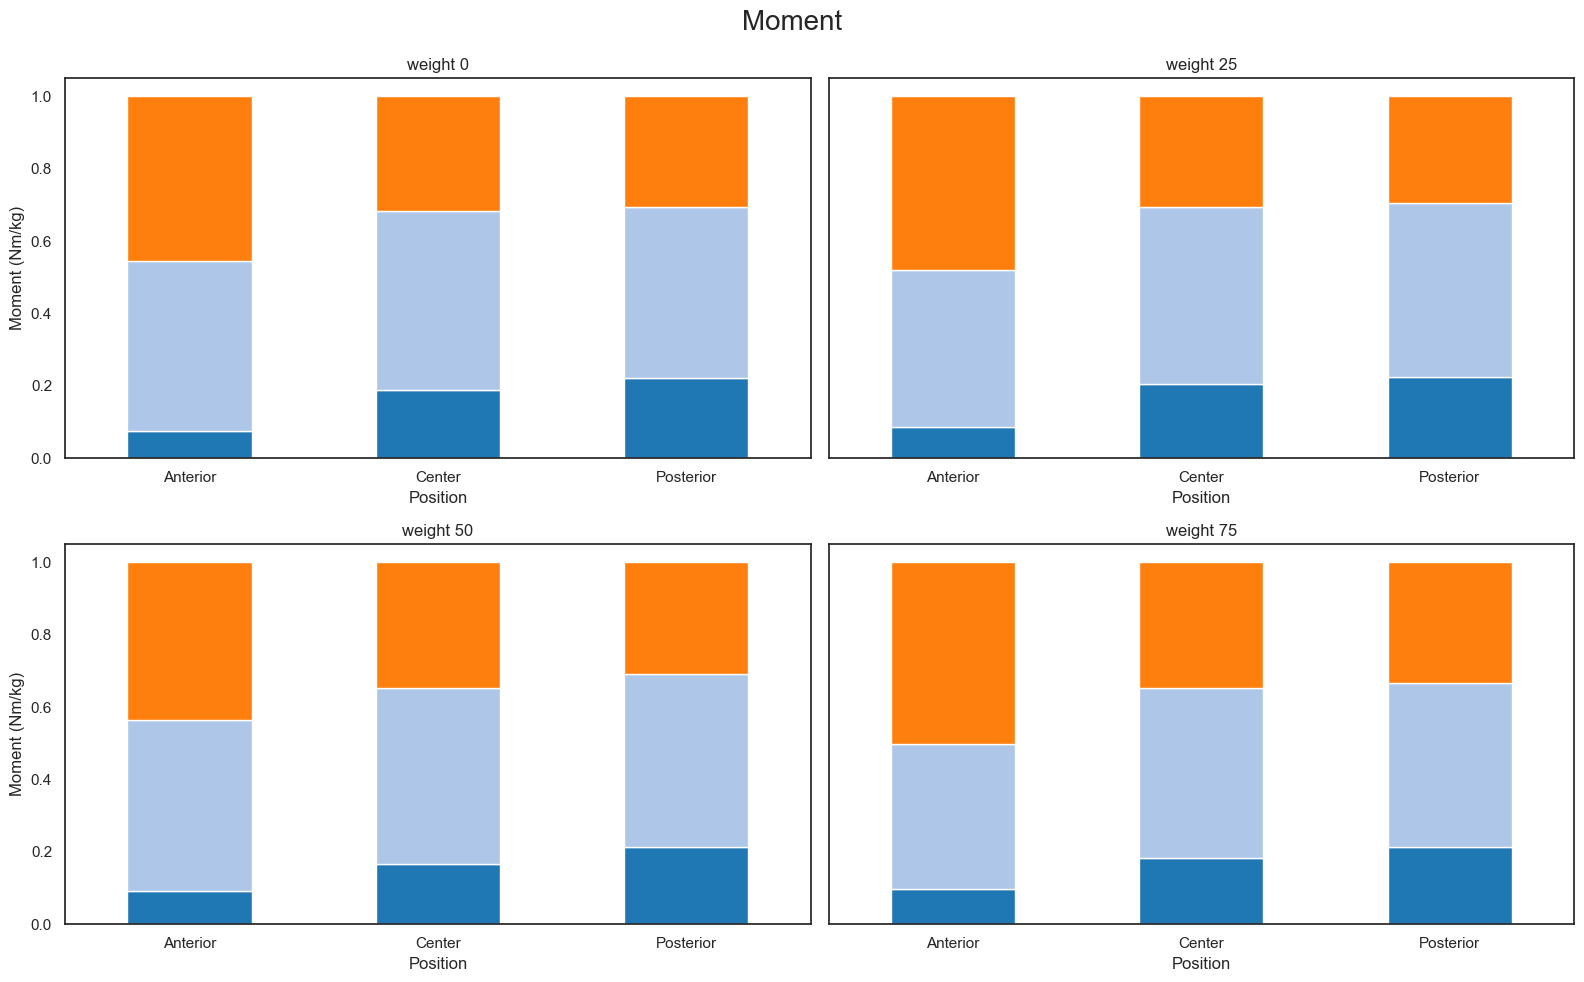

In [7]:
sns.set_theme(style="white", palette="tab20")

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

df_0_per = df_0_per.loc[["Ankle Joints Moment (Nm/kg)", "Knee Joints Moment(Nm/kg)", "Hip Joints Moment(Nm/kg)"]] # 순서맞추기
df_0_per.T.plot(kind='bar', stacked=True, ax=axes[0,0], legend=False, title='weight 0')

df_25_per = df_25_per.loc[["Ankle Joints Moment (Nm/kg)", "Knee Joints Moment(Nm/kg)", "Hip Joints Moment(Nm/kg)"]] # 순서맞추기
df_25_per.T.plot(kind='bar', stacked=True, ax=axes[0,1], legend=False, title='weight 25')

df_50_per = df_50_per.loc[["Ankle Joints Moment (Nm/kg)", "Knee Joints Moment(Nm/kg)", "Hip Joints Moment(Nm/kg)"]] # 순서맞추기
df_50_per.T.plot(kind='bar', stacked=True, ax=axes[1,0], legend=False, title='weight 50')

df_75_per = df_75_per.loc[["Ankle Joints Moment (Nm/kg)", "Knee Joints Moment(Nm/kg)", "Hip Joints Moment(Nm/kg)"]] # 순서맞추기
df_75_per.T.plot(kind='bar', stacked=True, ax=axes[1,1], legend=False, title='weight 75')


custom_xticks = ["Anterior", "Center", "Posterior"]  # 새로운 X축 라벨
for ax in axes.flat:
    ax.set_xticks(range(len(custom_xticks)))  # X축 위치 설정
    ax.set_xticklabels(custom_xticks, rotation=0)  # X축 라벨 설정 및 회전
for ax in axes.flat:
    ax.set_xlabel("Position")
    ax.set_ylabel("Moment (Nm/kg)")


plt.tight_layout(rect=[0, 0, 1, 0.95])  # 공통 제목 위치 확보
fig.suptitle('Moment', fontsize=20)
plt.show()

findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
C:\Users\hebo9\AppData\Local\Temp\ipykernel_24732\1074363679.py:1

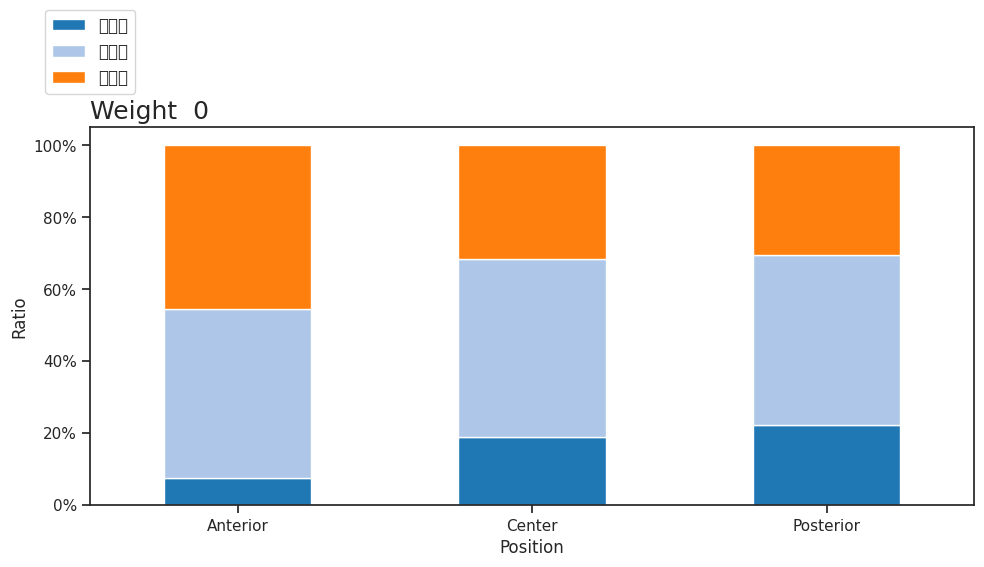

In [13]:
ax = df_0_per.T.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Position')
plt.ylabel('Ratio')

ax.set_xticklabels(["Anterior", "Center", "Posterior"], rotation=0) 
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

plt.legend(bbox_to_anchor=(0, 1.2), loc='center', prop={'size':12})
plt.title('Weight  0', fontsize=18, loc='left')

plt.tight_layout()
plt.show()

In [9]:
rename = ['a','b','c']
df_0_per.rename(index={"Ankle Joints Moment (Nm/kg)": "종아리", 
                       "Knee Joints Moment(Nm/kg)": "허벅지",
                       "Hip Joints Moment(Nm/kg)": "엉덩이"
                       }, inplace=True)
df_0_per

,0_A,0_C,0_P
종아리,0.076339,0.189785,0.222564
허벅지,0.468802,0.494516,0.473336
엉덩이,0.454859,0.315699,0.304100


findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
C:\Users\hebo9\AppData\Local\Temp\ipykernel_24732\662895393.py:54: UserWarning: Glyph 50526 (\N{HANGUL SYLLABLE AP}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Pretendard variable' not found.
C:\Users\hebo9\AppData\Local\Temp\ipykernel_24732\662895393.py:54: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Users\hebo9\AppData\Local\Temp\ipykernel_24732\662895393.py:54: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Pretendard variable' not found.
C:\Users\hebo9\AppData\Local\Temp\ipykernel_24732\662895393.py:54: UserWarning: Glyph 46244 (\N{HANGUL SYLLABLE DWI}) missing from current font.
  plt.tight_layout()
findfont: Font family 'Pretendard variable' not found.
findfont: Font family 'Pretendard variable' not found.
C:\Use

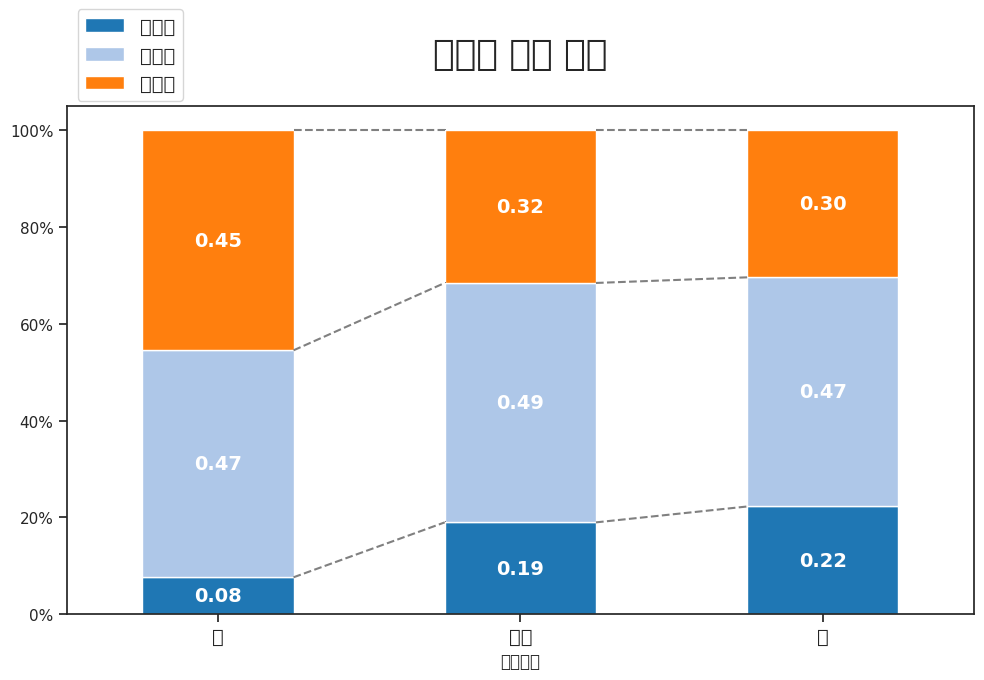

In [10]:
sns.set_theme(style='ticks', palette='tab20')
plt.rc('font', family='Pretendard variable') # 한글폰트 지정



cumulative_data = df_0_per.cumsum(axis=0)  # 각 열의 누적값 계산

# X축 설정
categories = df_0_per.columns  # X축 라벨
x = np.arange(len(categories))  # X축 위치
bar_width = 0.5  # 막대 너비

# # 누적 막대그래프 그리기
ax = df_0_per.T.plot(kind='bar', stacked=True, figsize=(10, 7))

# 계열선 추가
for i in range(len(df_0_per.index)):
    for j in range(len(x) - 1):  # 마지막 막대는 다음 막대가 없으므로 제외
        # 현재 막대 오른쪽 끝에서 다음 막대 왼쪽 끝까지 선 연결
        ax.plot(
            [x[j] + bar_width / 2, x[j + 1] - bar_width / 2],  # X좌표 (현재 오른쪽 끝 -> 다음 왼쪽 끝)
            [cumulative_data.iloc[i, j], cumulative_data.iloc[i, j + 1]],  # Y좌표 (현재 -> 다음)
            color='gray', linestyle='--', marker=',' if j == 0 else None
        )

# 막대 위에 값 표시
for i, row_name in enumerate(df_0_per.index):
    for j, category in enumerate(categories):
        # 각 누적 막대의 중앙에 값 표시
        if i == 0:
            y_position = df_0_per.iloc[i, j] / 2
        else:
            y_position = cumulative_data.iloc[i - 1, j] + (df_0_per.iloc[i, j] / 2)
        ax.text(x[j], y_position, f"{df_0_per.iloc[i, j]:.2f}", ha='center', va='center', fontsize=14, fontweight=800, color='white')


# 축 설정
ax.set_xticks(x)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(categories, rotation=0)
ax.set_xticklabels(["앞", "중앙", "뒤"], rotation=0, fontsize=14)  # x축라벨설정
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
# ax.set_ylabel("근육 사용 비율")
ax.set_xlabel("무게중심")

# 범례 추가
# legend_label = ['l7','l8','l9']
# ax.legend(bbox_to_anchor=(0.93, 1.1), loc='center', prop={'size':14})
ax.legend(bbox_to_anchor=(0.07, 1.1), loc='center', prop={'size':14})

plt.title('근육의 사용 비율', fontsize=26, loc='center', pad=30)

# 레이아웃 조정
plt.tight_layout()
plt.show()
